In [16]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>''')

<a name="Top"></a>

In [17]:
from IPython.display import HTML
HTML('''
<style>
    .yourDiv {position: fixed;top: 100px; right: 0px; 
              background: white;
              height: 100%;
              width: 175px; 
              padding: 10px; 
              z-index: 10000}
</style>
<script>
function showthis(url) {
	window.open(url, "pres", 
                "toolbar=yes,scrollbars=yes,resizable=yes,top=10,left=400,width=500,height=500");
	return(false);
}
</script>

<div class=yourDiv>
    <h4>MENU</h4><br>
    <a href=#Data>1.Data</a><br>
    <a href=#SpatialCoverage>2. Spatial Coverage</a><br><br>

    <a href=#Top>Top</a><br>
    <a href="javascript:code_toggle()">Toggle Code On/Off</a><br>
    
    <h4>PROJECT NOTEBOOKS</h4><br>
    <a href='https://vinnyricciardi.github.io/farmsize_site/Html/Project_Overview'>Project Overview</a><br>
    <a href='https://vinnyricciardi.github.io/farmsize_site/Html/Data_Coverage'>Data Coverage</a><br>
    <a href='https://vinnyricciardi.github.io/farmsize_site/Html/General_Results'>General Results</a><br>
    <a href='https://vinnyricciardi.github.io/farmsize_site/Html/Global_Estimate'>Global Estimates</a><br>
    <a href='https://vinnyricciardi.github.io/farmsize_site/Html/Crop_Diversity'>Crop Diversity</a><br>
    <a href='https://vinnyricciardi.github.io/farmsize_site/Html/Sensitivity_Analyses'>Sensitivity Analyses</a><br>
    <a href='https://vinnyricciardi.github.io/farmsize_site/'>Site Index</a><br>
</div>
''')

<a name="Top"></a>
<center><h1>Data Coverage Overview</h1>


In [15]:
# Import dependencies
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.pyplot import cm 
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import numpy as np
import re
import geopy
import mpld3
import plotly.plotly as py
import cmocean

pd.set_option('display.max_columns', 500)
%matplotlib inline

In [4]:
try:
    PATH1 = '/Users/Vinny_Ricciardi/Documents/Data_Library_Big/Survey/Global/Farm_Size/Data/FarmSize_data_fullyProcessed.csv'
    df = pd.read_csv(PATH1, low_memory=False)
    PATH2 = '/Users/Vinny_Ricciardi/Documents/Data_Library_Big/Survey/Global/FaoStat/FAOSTAT/Production_Crops_E_All_Data_(Normalized)_with_regions.csv'
    fao = pd.read_csv(PATH2)
except:
    PATH1 = '/home/vinny_ricciardi/Documents/Data_Library_SSD/Survey/Global/Farm_Size/Data/FarmSize_data_fullyProcessed.csv'
    df = pd.read_csv(PATH1, low_memory=False)
    PATH2 = '/home/vinny_ricciardi/Documents/Data_Library_SSD/Survey/Global/FaoStat/FAOSTAT/Production_Crops_E_All_Data_(Normalized)_with_regions.csv'
    fao = pd.read_csv(PATH2)

In [5]:
# Top harvest area in world
# tmp = fao.loc[(fao['Element'] == 'Area harvested') & (fao['Year'] == 2011)]
# pivot = pd.pivot_table(tmp, index='Area', values='Value', aggfunc=np.nansum)
# pivot = pivot.reset_index()
# pivot = pivot.sort_values('Value')
# pivot.tail(40)

In [6]:
# earthstat = ['Algeria', 
#               'Argentina', 
#               'Austria', 
#               'Denmark', 
#               'Estonia', 
#               'Lithuania', 
#               'Luxembourg', 
#               'Netherlands', 
#               'Norway', 
#               'Poland', 
#               'Portugal', 
#               'Romania', 
#               'Slovakia', 
#               'Cote divoire', 
#               'Elsalvador', 
#               'Laos', 
#               'Panama', 
#               'Oman', 
#               'Uruguay', 
#               'Spain', 
#               'Belgium', 
#               'Czechrepublic', 
#               'Slovenia', 
#               'Rwanda', 
#               'Malta']

# lowder = ['China', "Albania",
#           "Algeria",
#           "American Samoa",
#           "Argentina",
#           "Austria",
#           "Bahamas",
#           "Barbados",
#           "Belgium",
#           "Brazil",
#           "Bulgaria",
#           "Burkina Faso",
#           "Chile",
#           "Colombia",
#           "Cªte d'Ivoire",
#           "Croatia",
#           "Cyprus",
#           "Czech Republic",
#           "Democratic Republic of the Congo",
#           "Denmark",
#           "Dominica",
#           "Ecuador",
#           "Egypt",
#           "Estonia",
#           "Ethiopia",
#           "Fiji",
#           "Finland",
#           "France",
#           "French Polynesia",
#           "Georgia",
#           "Germany",
#           "Greece",
#           "Grenada",
#           "Guam",
#           "Guatemala",
#           "Guinea",
#           "Honduras",
#           "India",
#           "Indonesia",
#           "Iran (Islamic Republic of)",
#           "Ireland",
#           "Italy",
#           "Japan",
#           "Jamaica",
#           "Jordan",
#           "Korea, Rep. of",
#           "Kyrgyzstan",
#           "Lao People's Democratic Republic",
#           "Latvia",
#           "Lebanon",
#           "Lithuania",
#           "Luxembourg",
#           "Malta",
#           "Morocco",
#           "Myanmar",
#           "Namibia",
#           "Nepal",
#           "Netherlands",
#           "Nicaragua",
#           "Northern Mariana Islands",
#           "Norway",
#           "Pakistan",
#           "Panama",
#           "Paraguay",
#           "Peru",
#           "Philippines",
#           "Poland",
#           "Portugal",
#           "Puerto Rico",
#           "Qatar",
#           "Romania",
#           "Saint Lucia",
#           "Saint Vincent and the Grenadines",
#           "Samoa",
#           "Senegal",
#           "Serbia",
#           "Sweden",
#           "Switzerland",
#           "Thailand",
#           "Trinidad and Tobago",
#           "Turkey",
#           "Uganda",
#           "United Kingdom",
#           "United States of America",
#           "Uruguay",
#           "Venezuela (Bolivarian Republic of)",
#           "Virgin Islands, United States",
#           "Yemen",
#           "Cook Islands",
#           "French Guiana",
#           "Guadeloupe",
#           "Martinique",
#           "R_union",
#           "Canada",
#           "China",
#           "Guinea Bissau",
#           "Hungary",
#           "Lesotho",
#           "Libya",
#           "Malawi",
#           "Mozambique",
#           "New Zealand",
#           "Slovakia",
#           "Slovenia",
#           "Spain",
#           "St. Kitts & Nevis",
#           "Viet Nam",
#           "Australia",
#           "Djibouti",
#           "Mali",
#           "Togo",
#           "Zambia"]

# for i in lowder:
#     has.append(i)
# print len(has)

# # Note: by adding Lowder, we can have ~170 countries, representing ~ 90% of produciton and ~87% of harvest area

In [7]:
year = int(round(df['year'].mean(), 0))
has = list(df['NAME_0'].unique())
# has.insert(0, "China")  # Note, China has the most harvest area missing (~20%+ of global)
# has.insert(0, "Argentina")
# has.insert(0, "Indonesia")
# has.insert(0, "Ukraine")
# has.insert(0, "Canada")
# has.insert(0, "Australia")


for t in ['Area harvested', 'Production']:
    tmp1 = fao.loc[(fao['Area'] == 'World') & (fao['Element'] == t) & (fao['Year'] == year)]
    tmp2 = fao.loc[(fao['Area'].isin(has)) & (fao['Element'] == t) & (fao['Year'] == year)]
    perc = tmp2.Value.sum() / tmp1.Value.sum()
    if t is 'Production':
        p = perc
    else:
        a = perc
# print p, a

In [8]:
df = df.query("production_Food_kcal == production_Food_kcal")
num_countries = len(df.NAME_0.unique())
num_crops = len(df.Crop.unique())
num_crops_fao = len(df.Crop.unique())
num_admin = len(df.shpID.unique())
num_micro = len(df.query("microdata == 1").NAME_0.unique())
num_tab = len(df.query("microdata == 0").NAME_0.unique())
num_sur = len(df.query("cen_sur == 'sur'").NAME_0.unique())
num_cen = len(df.query("cen_sur == 'cen'").NAME_0.unique())
avg_year = int(round(df.year.mean(), 0))
min_year = df.year.min().astype(int)
max_year = df.year.max().astype(int)
perc_area = round(100 * a, 1)
perc_prod = round(100 * p, 1)

<a name="Data"></a>
<h2>Data</h2><br>


- Our dataset caputres the amount crop production by farms size<br>
- {{num_countries}} countries are represented at either the national or subnational level.<br>
- In total, there are {{num_admin}} national or subnational units.<br>
- This captures {{perc_area}}% of global harvest area and {{perc_prod}}% of global crop production<br>
- There are {{num_crops}} crops which we were able to match with the FAO's database to calculate the amount of crops produced by farm size class for food, feed, waste, seed, proccessing, and other in terms of kcal.<br>
- We used {{num_tab}} tabulated datasets, and {{num_micro}} microdatasets (i.e., data at the household record level)
- {{num_cen}} agricultural  censuses were used. Where census data was not used, nationally or subnationally representative household surveys were used ({{num_sur}} in total).
- On average the data was from {{avg_year}}, with the oldest datasets from {{min_year}} and the newest from {{max_year}}<br>
- We used the World Census of Agriculture's (WCA) farm size categories to be consistent with other studies.<br><br>

[Click here to see our main findings](https://vinnyricciardi.github.io/farmsize_site/Html/General_Results)


<a name="SpatialCoverage"></a>
<h2>Spatial Coverage</h2>

In [9]:
df['NAME_0'].replace(['United States of America'], ['United States'], inplace=True)
df['NAME_0'].replace(['Bosnia and Herzegovina'], ['Bosnia and Herz.'], inplace=True)
df['NAME_0'].replace(['United Republic of Tanzania'], ['Tanzania'], inplace=True)
df['NAME_0'].replace(['Russian Federation'], ['Russia'], inplace=True)
df['NAME_0'].replace(['Czech Republic'], ['Czech Rep.'], inplace=True)
df['NAME_0'].replace(['Czech Republic'], ['Czech Rep.'], inplace=True)
df['NAME_0'].replace(['Czech Republic'], ['Czech Rep.'], inplace=True)

To do:
- Map to be replaced with map of sub-national units after we spatially match all admin units

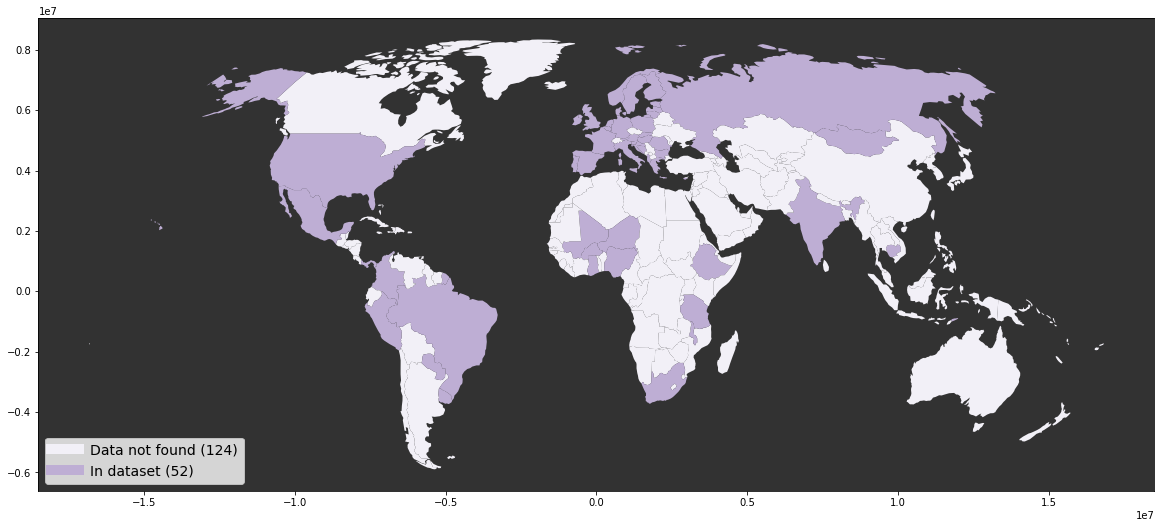

In [20]:
pivoted = pd.pivot_table(df, 
                         index='NAME_0', 
                         values='Crop', 
                         aggfunc=lambda x: len(x.unique()))
pivoted = pivoted.reset_index()
pivoted = pivoted.sort_values('Crop', ascending=False)
pivoted['Data_Available'] = pivoted['Crop'].astype(int)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

world = world.to_crs("+proj=robin") # world.to_crs(epsg=3395) would also work


world = pd.merge(world, pivoted, 
                 how='outer', 
                 left_on='name', 
                 right_on='NAME_0')

world['Orig_crop'] = world['Crop'].fillna(0)
world['coverage'] = np.where(world['Crop'] > 0, 
                             'Found and downloaded', 
                             np.where(world['Crop'] == -1, 
                                      'Found not downloaded',
                                      'No data found'))

warnings.filterwarnings('ignore')

x = len(pivoted.NAME_0.unique())

colors = {'data': '#beaed4',
          'nodata': '#f2f0f7'}

cmap = LinearSegmentedColormap.from_list('mycmap', [colors['data'], 
                                                    colors['nodata']])

try:
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_aspect('equal')
    world.plot(column='coverage', cmap=cmap, ax=ax, alpha=1, linewidth=0.1)  #cmocean.cm.deep
except:
    pass

ndf, fad = world.coverage.value_counts()
cmap_ = cmocean.tools.get_dict(cmocean.cm.deep, N=4)

p1 = mpl.lines.Line2D([], [], 
                             color=colors['nodata'],
                             linewidth=10, 
                             label='Data not found ({})'.format(ndf))
p2 = mpl.lines.Line2D([], [], 
                             color=colors['data'], 
                             linewidth=10, 
                             label='In dataset ({})'.format(fad))

handles = [p1, p2]
labels = [h.get_label() for h in handles] 

legend = ax.legend(handles=handles, labels=labels, frameon=True, 
                   fontsize=14, loc='lower left')

legend.get_frame().set_facecolor('#ffffff')

ax.set_axis_bgcolor("#323232")
ax.grid(alpha=0.0)

plt.show()

In [13]:
# <a name="LeftOff"></a>
# <h3>Left Off</h3>